<a href="https://colab.research.google.com/github/ScottReidux/Capstone_Team_5/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Loading

In [1]:
# Access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import pandas
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/grants.csv'
grants_df = pd.read_csv(file_path)

# Display the first few rows
print("First few rows of the dataset:")
grants_df.head()

First few rows of the dataset:


,Unnamed: 0,opportunity_id,opportunity_title,opportunity_number,opportunity_category,funding_instrument_type,category_of_funding_activity,cfda_numbers,eligible_applicants,eligible_applicants_type,...,post_date,close_date,last_updated_date,archive_date,award_ceiling,award_floor,estimated_total_program_funding,expected_number_of_awards,cost_sharing_or_matching_requirement,additional_information_url
0,0,262148,Establishment of the Edmund S. Muskie Graduate...,SCAPPD-14-AW-161-SCA-08152014,Discretionary,Cooperative Agreement,Other,19.040,Others,Non-Government Organization,...,2014-08-15,2014-09-04,2014-08-20,2014-10-04,600000.0,400000.0,600000.0,1.0,False,NaN
1,1,262308,Health and resiliency of salt marshes in Jamai...,NPS-14-NERO-0119,Discretionary,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,...,2014-08-18,2014-08-23,2014-08-18,2014-08-24,275897.0,275897.0,275897.0,1.0,False,NaN
2,2,262368,Post-Hurricane Sandy submerged marine habitat ...,NPS-14-NERO-0125,Discretionary,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,...,2014-08-19,2014-08-24,2014-08-19,2014-08-25,480000.0,480000.0,480000.0,1.0,False,NaN
3,3,262390,Inventory and Monitoring of Amphibians and Rep...,NPS-14-NERO-0087,Discretionary,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,...,2014-08-19,2014-08-24,2014-08-19,2014-08-25,255577.0,255577.0,255577.0,1.0,False,NaN
4,4,131594,Youth Leadership Program with Algeria,ECA-PE-C-PY-12-09,Discretionary,Cooperative Agreement,Other,19.415,Others,Non-Government Organization,...,2011-11-21,2012-01-04,2011-11-21,2012-01-05,250000.0,NaN,250000.0,1.0,True,http://exchanges.state.gov/grants/open2.html


##Initial Data Exploration

In [4]:
# Display basic information about the dataset
print("Dataset Information:")
grants_df.info()

# Check for missing values and summary statistics
print("\nSummary Statistics:")
grants_df.describe()

print("\nMissing Values Count:")
print(grants_df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75640 entries, 0 to 75639
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            75640 non-null  int64  
 1   opportunity_id                        75640 non-null  int64  
 2   opportunity_title                     75640 non-null  object 
 3   opportunity_number                    75640 non-null  object 
 4   opportunity_category                  75640 non-null  object 
 5   funding_instrument_type               75640 non-null  object 
 6   category_of_funding_activity          75640 non-null  object 
 7   cfda_numbers                          74815 non-null  float64
 8   eligible_applicants                   75640 non-null  object 
 9   eligible_applicants_type              75640 non-null  object 
 10  agency_code                           75597 non-null  object 

##Data Cleaning

In [5]:
# Drop irrelevant columns
grants_df = grants_df.drop(columns=['Unnamed: 0', 'additional_information_url'])
print("Dropped irrelevant columns.")

Dropped irrelevant columns.


In [7]:
# Fill categorical columns with "Unknown"
grants_df['agency_code'] = grants_df['agency_code'].fillna("Unknown")
grants_df['agency_name'] = grants_df['agency_name'].fillna("Unknown")
grants_df['cfda_numbers'] = grants_df['cfda_numbers'].fillna("Unknown")

# Fill numeric columns with median values
grants_df['award_ceiling'] = grants_df['award_ceiling'].fillna(grants_df['award_ceiling'].median())
grants_df['award_floor'] = grants_df['award_floor'].fillna(grants_df['award_floor'].median())
grants_df['estimated_total_program_funding'] = grants_df['estimated_total_program_funding'].fillna(grants_df['estimated_total_program_funding'].median())
grants_df['expected_number_of_awards'] = grants_df['expected_number_of_awards'].fillna(grants_df['expected_number_of_awards'].median())

print("Missing values handled without inplace warnings.")

Missing values handled without inplace warnings.


In [8]:
# Convert date columns to datetime format
date_columns = ['post_date', 'close_date', 'last_updated_date', 'archive_date']
for col in date_columns:
    grants_df[col] = pd.to_datetime(grants_df[col], errors='coerce')

# Drop rows where essential date fields are missing
grants_df = grants_df.dropna(subset=['close_date', 'archive_date'])
print("Date columns converted and essential missing dates handled.")

Date columns converted and essential missing dates handled.


##Basic Exploratory Data Analysis

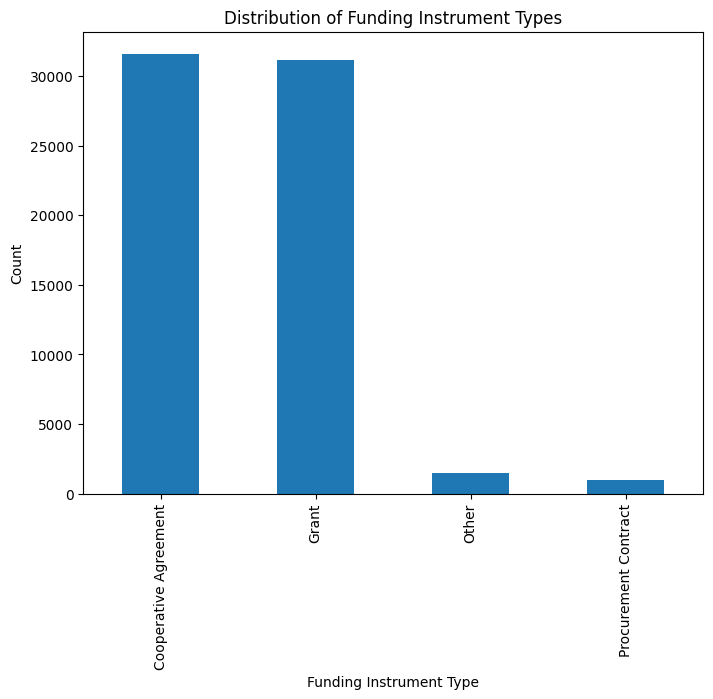

In [9]:
import matplotlib.pyplot as plt

# Plot the distribution of funding instrument types
plt.figure(figsize=(8,6))
grants_df['funding_instrument_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Funding Instrument Types')
plt.xlabel('Funding Instrument Type')
plt.ylabel('Count')
plt.show()

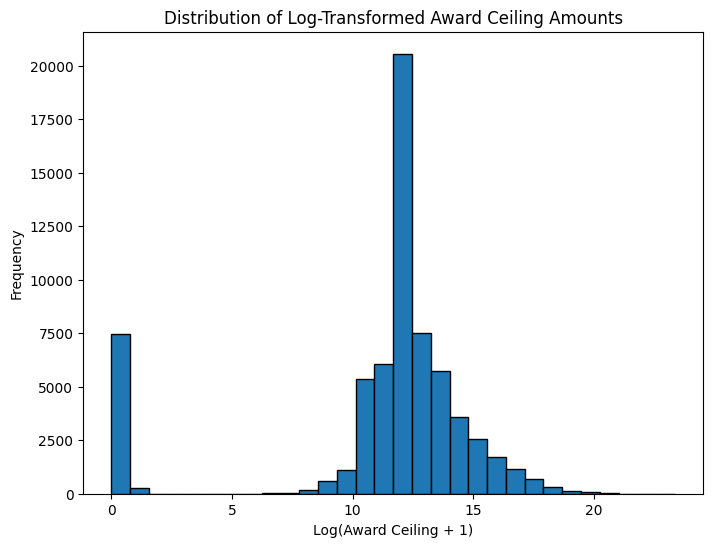

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Apply log transformation (adding 1 to avoid log(0))
plt.figure(figsize=(8,6))
np.log1p(grants_df['award_ceiling']).dropna().plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Log-Transformed Award Ceiling Amounts')
plt.xlabel('Log(Award Ceiling + 1)')
plt.ylabel('Frequency')
plt.show()

##Save the Cleaned Data

In [15]:
# Save the cleaned data to Google Drive
output_path_drive = '/content/drive/MyDrive/cleaned_grants.csv'
grants_df.to_csv(output_path_drive, index=False)
print(f"Cleaned dataset saved to Google Drive at {output_path_drive}")

Cleaned dataset saved to Google Drive at /content/drive/MyDrive/cleaned_grants.csv
